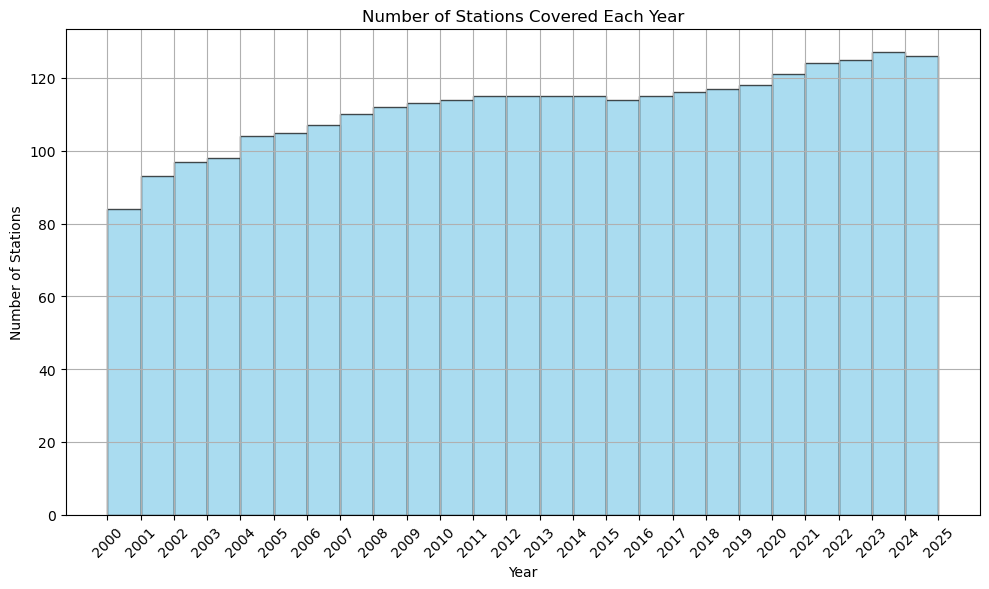

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
directory = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files'

# Dictionary to store station names and corresponding years
station_years = {}

# Iterate through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        # Read the CSV file
        df = pd.read_csv(filepath)
        # Extract the station name (filename without extension)
        station_name = os.path.splitext(filename)[0]
        # Search for the column named "year" in the header
        year_column = df.columns[df.columns.str.lower() == 'year'].tolist()
        if year_column:
            # Extract the years from the "year" column
            years = df[year_column[0]].dropna().astype(int).unique().tolist()
            # Store the station name and corresponding years
            station_years[station_name] = years

# Create a list of all years covered by any station
all_years = [year for years in station_years.values() for year in years]

# Create a histogram showing the number of stations active in each year
plt.figure(figsize=(10, 6))
plt.hist(all_years, bins=range(2000, 2026), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Number of Stations Covered Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.xticks(range(2000, 2026), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()